As. 5

group 6

In [842]:
import numpy as np 
import math 
from yahoofinancials import YahooFinancials
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels import regression

In [843]:
def mean(portfolio):
    mean_val = sum(portfolio)/len(portfolio)
    return mean_val

def exp_value(portfolio, weight):
    portfolio = np.asarray(portfolio)
    weight = np.asarray(weight)
    exp_values = sum(weight * portfolio)/sum(weight)
    return exp_values


def weekly_returns(portfolio):
    weekly_return = []
    for i in range(0,len(portfolio)):
        if i == len(portfolio)-1:
            break
        ret_val = np.log((float(portfolio['adjclose'][i+1])/float(portfolio['adjclose'][i])))
        weekly_return.append(ret_val)
    return weekly_return

def yearly_returns(weekly_returns):
    year_ret = np.add.reduceat(weekly_returns, np.arange(0,len(weekly_returns),52))
    return year_ret

def port_allocation():
    weights = np.round([*np.arange(0,1,0.1)],1)

    port_weights = []

    for i in weights:
        for j in weights:
            for k in weights: 
                if i+j+k == 1:
                    port_weights.append([i,j,k])
    return port_weights



def weight_text(weight):
    desc =(
        f"Asset 1 :"  + str(round(weight[0]*100)) +"%"+"\n" + 
        f"Asset 2 : " + str(round(weight[1]*100)) +"%"+"\n" + 
        f"Asset 3 : " + str(round(weight[2]*100)) +"%")
    return desc
 
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    return model 


def calculate_parameters(x,y):
    model = linreg(x,y)
    alpha = model.params[0]
    beta = model.params[1]
    var_ei = np.var(model.resid,ddof=1)
    return alpha, beta, var_ei

In [844]:
tickerSymbol=['AXP','MCD','GOOG','XOM','IBM','NKE','WMT','KO','^GSPC']
portfolio=pd.DataFrame()

In [845]:
axp_data = YahooFinancials("AXP")
axp = axp_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
axp_format = pd.DataFrame(axp['AXP']['prices'])

mcd_data = YahooFinancials("MCD")
mcd = mcd_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
mcd_format = pd.DataFrame(mcd['MCD']['prices'])

goog_data = YahooFinancials("GOOG")
goog = goog_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
goog_format = pd.DataFrame(goog['GOOG']['prices'])

xom_data = YahooFinancials("XOM")
xom = xom_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
xom_format = pd.DataFrame(xom['XOM']['prices'])

ibm_data = YahooFinancials("IBM")
ibm = ibm_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
ibm_format = pd.DataFrame(ibm['IBM']['prices'])

nke_data = YahooFinancials("NKE")
nke = nke_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
nke_format = pd.DataFrame(nke['NKE']['prices'])

wmt_data = YahooFinancials("WMT")
wmt = wmt_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
wmt_format = pd.DataFrame(wmt['WMT']['prices'])

ko_data = YahooFinancials("KO")
ko = ko_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
ko_format = pd.DataFrame(ko['KO']['prices'])

sp500_data = YahooFinancials("^GSPC")
sp500 = sp500_data.get_historical_price_data('2007-01-01','2013-01-01','Weekly')
sp500_format = pd.DataFrame(sp500['^GSPC']['prices'])

In [846]:
portfolio['AXP']=axp_format['adjclose']
portfolio['MCD']=mcd_format['adjclose']
portfolio['GOOG']=goog_format['adjclose']
portfolio['XOM']=xom_format['adjclose']
portfolio['IBM']=ibm_format['adjclose']
portfolio['NKE']=nke_format['adjclose']
portfolio['WMT']=wmt_format['adjclose']
portfolio['KO']=ko_format['adjclose']
portfolio['^GSPC']=sp500_format['adjclose']

In [847]:
print(portfolio.head())

         AXP        MCD       GOOG        XOM        IBM        NKE  \
0  45.246086  26.971581  12.134268  40.553871  54.141140   9.966840   
1  45.266178  27.392824  12.577855  40.232719  55.208179  10.060623   
2  44.560444  27.758324  12.198029  40.714432  53.446434  10.078782   
3  44.376331  26.593718  12.349710  40.758743  54.157806   9.600758   
4  44.614151  27.591061  11.992549  41.827400  55.113674  10.105001   

         WMT         KO        ^GSPC  
0  32.887573  14.330647  1409.709961  
1  33.297016  14.416762  1430.729980  
2  33.526020  14.330647  1430.500000  
3  33.081882  14.202956  1422.180054  
4  33.366425  14.324711  1448.390015  


#### Log Returns

In [848]:
#market continuous returns 

# American Express, MCD, Exxon, IBM, Nike, Wal-Mart, Coca Cola 
#axp
axp_weekly_ret = weekly_returns(axp_format)
axp_yearly = np.log(np.array(axp_format['adjclose'][1:])/np.array(axp_format['adjclose'][:-1]))
axp_var = np.var(axp_yearly)

#mcd
mcd_weekly_ret = weekly_returns(mcd_format)
mcd_yearly = np.log(np.array(mcd_format['adjclose'][1:])/np.array(mcd_format['adjclose'][:-1]))
mcd_var = np.var(mcd_yearly)

goog_weekly_ret = weekly_returns(goog_format)
goog_yearly = np.log(np.array(goog_format['adjclose'][1:])/np.array(goog_format['adjclose'][:-1]))
goog_var = np.var(goog_yearly)
#xom
xom_weekly_ret = weekly_returns(xom_format)
xom_yearly = np.log(np.array(xom_format['adjclose'][1:])/np.array(xom_format['adjclose'][:-1]))
xom_var = np.var(xom_yearly)
#ibm
ibm_weekly_ret = weekly_returns(ibm_format)
ibm_yearly = np.log(np.array(ibm_format['adjclose'][1:])/np.array(ibm_format['adjclose'][:-1]))
ibm_var = np.var(ibm_yearly)
#nke
nke_weekly_ret = weekly_returns(nke_format)
nke_yearly = np.log(np.array(nke_format['adjclose'][1:])/np.array(nke_format['adjclose'][:-1]))
nke_var = np.var(nke_yearly)
#wmt 
wmt_weekly_ret = weekly_returns(wmt_format)
wmt_yearly = np.log(np.array(wmt_format['adjclose'][1:])/np.array(wmt_format['adjclose'][:-1]))
wmt_var = np.var(wmt_yearly)
#ko
ko_weekly_ret = weekly_returns(ko_format)
ko_yearly = np.log(np.array(ko_format['adjclose'][1:])/np.array(ko_format['adjclose'][:-1]))
ko_var = np.var(ko_yearly)

#s&p500
sp500_weekly_ret = weekly_returns(sp500_format)
sp500_yearly = np.log(np.array(sp500_format['adjclose'][1:])/np.array(sp500_format['adjclose'][:-1]))
sp500_var = np.var(sp500_yearly)

LogRet = np.array([axp_yearly,mcd_yearly,xom_yearly,ibm_yearly,nke_yearly,wmt_yearly,ko_yearly])



In [1]:
#market mean and var 
market_mean = 52 * np.mean(sp500_yearly)
print(f"Market Mean: {market_mean}")

market_var = 52*np.cov(sp500_yearly)
print(f"Market Var: {market_var}")
#these results are ok with the class


NameError: name 'np' is not defined

In [850]:
X1 = portfolio[['AXP']]
X2 = portfolio[['MCD']]
X3= portfolio[['GOOG']]
X4= portfolio[['XOM']]
X5= portfolio[['IBM']]
X6= portfolio[['NKE']]
X7= portfolio[['WMT']]
X8= portfolio[['KO']]
y = portfolio['^GSPC']

In [ ]:
#we have to take regression of log returns

Coefficients: [17.66141457]
Intercept: 595.5241896865082


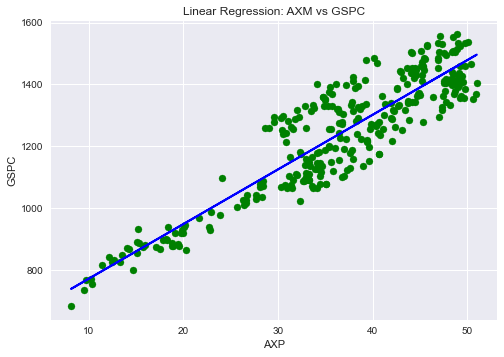

In [851]:

# Create a linear regression model
model1 = LinearRegression()

# Fit the model
model1.fit(X1, y)

# Make predictions
y_pred = model1.predict(X1)

# Print coefficients and intercept
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

# Plot the regression line
plt.scatter(X1, y, color='g')
plt.plot(X1, y_pred, color='blue', linewidth=2)
plt.xlabel('AXP')
plt.ylabel('GSPC')
plt.title('Linear Regression: AXM vs GSPC')
plt.show()

In [852]:
#covariance matrix
covar_matrix_pre = np.stack(LogRet, axis=0)
covar_matrix = 52 * np.cov(covar_matrix_pre)
covar_matrix


array([[0.19362158, 0.03681034, 0.05067637, 0.05974401, 0.07225228,
        0.03243505, 0.03414141],
       [0.03681034, 0.03710549, 0.02234445, 0.02144061, 0.03150686,
        0.01737415, 0.01811787],
       [0.05067637, 0.02234445, 0.05518932, 0.03096014, 0.03212199,
        0.0216058 , 0.02465012],
       [0.05974401, 0.02144061, 0.03096014, 0.0608988 , 0.04139489,
        0.0199286 , 0.02169174],
       [0.07225228, 0.03150686, 0.03212199, 0.04139489, 0.09448874,
        0.03026365, 0.02709732],
       [0.03243505, 0.01737415, 0.0216058 , 0.0199286 , 0.03026365,
        0.04045665, 0.01808287],
       [0.03414141, 0.01811787, 0.02465012, 0.02169174, 0.02709732,
        0.01808287, 0.03746551]])

In [853]:
apx_alpha, apx_beta, apx_var = calculate_parameters(sp500_yearly,axp_yearly)
mcd_alpha, mcd_beta, mcd_var = calculate_parameters(sp500_yearly,mcd_yearly)
goog_alpha, goog_beta, goog_var = calculate_parameters(sp500_yearly,goog_yearly)
xom_alpha, xom_beta, xom_var = calculate_parameters(sp500_yearly,xom_yearly)
ibm_alpha, ibm_beta, ibm_var = calculate_parameters(sp500_yearly,ibm_yearly)
wmt_alpha, wmt_beta, wmt_var = calculate_parameters(sp500_yearly,wmt_yearly)
ko_alpha, ko_beta, ko_var = calculate_parameters(sp500_yearly,ko_yearly)

In [854]:
X_val  = np.array([1/7] for i in range(7))
mean_returns = np.array([np.mean(i) for i in covar_matrix])
stds = np.array([np.std(i) for i in covar_matrix])

exp_ret = np.sum((1/7)*mean_returns)
print(f"Expected Return:{exp_ret}")


Expected Return:0.037724635311793646


In [855]:
var_val = np.var((1/7)*mean_returns)
print(f"Variance:{var_val}")

Variance:4.265506647910331e-06


In [856]:
alpha_val = np.array([apx_alpha, mcd_alpha,goog_alpha,xom_alpha,ibm_alpha,wmt_alpha,ko_alpha])
beta_val = np.array([apx_beta, mcd_beta,goog_beta,xom_beta,ibm_beta,wmt_beta,ko_beta])
var_val = np.array([apx_var, mcd_var,goog_var,xom_var,ibm_var,wmt_var,ko_var])

In [857]:
exp_ret_2 = np.sum((1/7)*alpha_val) + np.sum((1/7)*np.mean(sp500_yearly)*beta_val)
print(f"Expected Return: {exp_ret_2}")

Expected Return: 0.0015982620680204717


In [858]:
beta_val_2 = np.sum([(1/7)*beta_val])
beta_val_2

0.8116687718741826

In [859]:
var_val_2 = (beta_val_2 ** 2)*sp500_var + np.sum(((1/7)**2)*var_val)
print(f"Variance: {var_val}")

Variance: [0.00146694 0.00046884 0.00108868 0.00046424 0.00052821 0.0005402
 0.00043144]
